In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

np.random.seed(42)

In [9]:
df = pd.read_csv('course_page_actions.csv')
df.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


In [10]:
#Control Click Through Rate
control = df.query('group == "control"')
control_ctr = control.query('action == "enroll"').id.nunique() / control.query('action == "view"').id.nunique()

print('The Control CTR is {:.4f}'.format(control_ctr))

The Control CTR is 0.0128


In [11]:
#Experiment Click Through Rate
experiment = df.query('group == "experiment"')
experiment_ctr = experiment.query('action == "enroll"').id.nunique() / experiment.query('action == "view"').id.nunique()

print('The Experiment CTR is {:.4f}'.format(experiment_ctr))

The Experiment CTR is 0.0077


In [12]:
#Differences in CTR
df.groupby(['group', 'action']).count()

timestamp    id  duration
group      action                           
control    enroll         25    25         0
           view         1949  1949      1949
experiment enroll         16    16        16
           view         2079  2079      2079

In [13]:
#Observed difference
obser_diff = control_ctr - experiment_ctr

print('The difference in CTR is {:.4f}'.format(obser_diff))

The difference in CTR is 0.0051


In [14]:
bootstrap_samples = []
for i in range(10000):
    sample = df.sample(df.shape[0], replace=True)
    control = sample.query('group == "control"')
    control_ctr = control.query('action == "enroll"').id.nunique() / control.query('action == "view"').id.nunique()
    
    experiment = sample.query('group =="experiment"')
    experiment_ctr = experiment.query('action =="enroll"').id.nunique() / experiment.query('action == "view"').id.nunique()
    bootstrap_samples.append(control_ctr - experiment_ctr)



The 95% Confidence Interval is 0.0003 ---- 0.0099


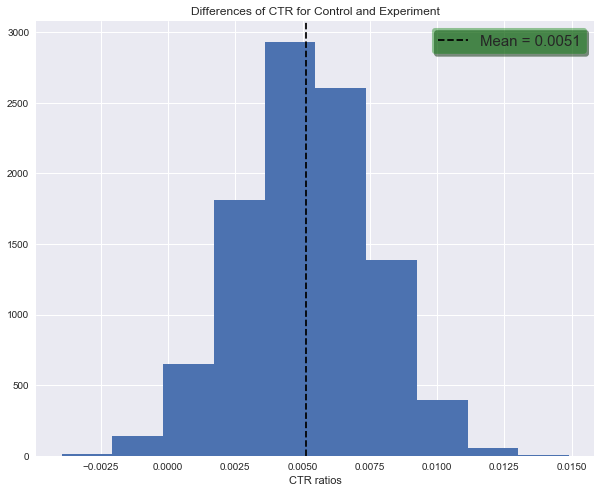

In [21]:
import seaborn as sns
sns.set()

plt.figure(figsize=(10, 8))
plt.hist(bootstrap_samples)
plt.xlabel('CTR ratios')
plt.title('Differences of CTR for Control and Experiment')
plt.axvline(np.mean(bootstrap_samples), linestyle='--', color='k', label='Mean = {:.4f}'.format(np.mean(bootstrap_samples)))
plt.legend(frameon=True, shadow=True, facecolor='g', framealpha = 0.4, fontsize=15)

ci = np.percentile(bootstrap_samples, [2.5, 97.5])
print('The 95% Confidence Interval is {:.4f} ---- {:.4f}'.format(ci[0], ci[1]))

array([0.00034631, 0.00994152])

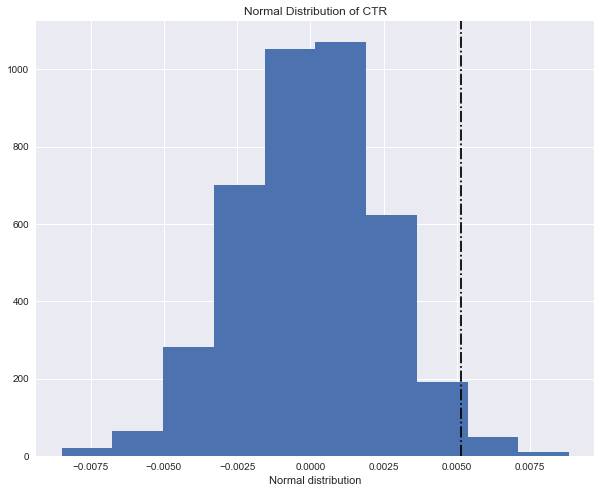

In [20]:
#Stimulating Normal Distribution Using std of samples
#We Take Mean to be 0 Since the null hypothesis states there is no difference
normal = np.random.normal(0, np.std(bootstrap_samples), size=df.shape[0]) 

plt.figure(figsize=(10, 8))
plt.hist(normal)
plt.xlabel('Normal distribution')
plt.title('Normal Distribution of CTR')
plt.axvline(obser_diff, linestyle='-.', color='k')


In [19]:
#p-value
(np.array(normal) > obser_diff).mean()

0.017940525927746375